In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def load_cora_data(cora_content_path, cora_cites_path):
    """Load Cora Dataset"""
    column_names = ['id'] + [f'word_{i}' for i in range(1433)] + ['class_label']
    cora_content = pd.read_csv(cora_content_path, sep='\t', header=None, names=column_names)
    cora_cites = pd.read_csv(cora_cites_path, sep='\t', header=None, names=['citing_paper', 'cited_paper'])
    
    return cora_content, cora_cites


def create_citation_graph(cora_cites):
    """Creates Citation Graph"""
    G = nx.Graph()
    edges = list(zip(cora_cites['citing_paper'], cora_cites['cited_paper']))
    G.add_edges_from(edges)
    
    return G


def visualize_graph(G):
    """Viusalize Citation Graph"""
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42) 
    nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)
    plt.show()

In [11]:
cora_content_path = r'C:\Users\jtann\OneDrive\Desktop\GCN-Benchmark\cora\cora.content'
cora_cites_path = r'C:\Users\jtann\OneDrive\Desktop\GCN-Benchmark\cora\cora.cites'

cora_content, cora_cites = load_cora_data(cora_content_path=cora_cites_path, cora_cites_path=cora_cites_path)

print("Columns of cora.content:")
print(cora_content.columns)

print("\nColumns of in cora.cites:")
print(cora_cites.columns)


Columns of cora.content:
Index(['id', 'word_0', 'word_1', 'word_2', 'word_3', 'word_4', 'word_5',
       'word_6', 'word_7', 'word_8',
       ...
       'word_1424', 'word_1425', 'word_1426', 'word_1427', 'word_1428',
       'word_1429', 'word_1430', 'word_1431', 'word_1432', 'class_label'],
      dtype='object', length=1435)

Columns of in cora.cites:
Index(['citing_paper', 'cited_paper'], dtype='object')


### Examining the number of Nodes and Edges 

In [4]:
G = create_citation_graph(cora_cites=cora_cites)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Ave degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")


num_connected_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_connected_components}")

largest_cc = max(nx.connected_components(G), key=len)
print(f"Largest connected component size: {len(largest_cc)}")


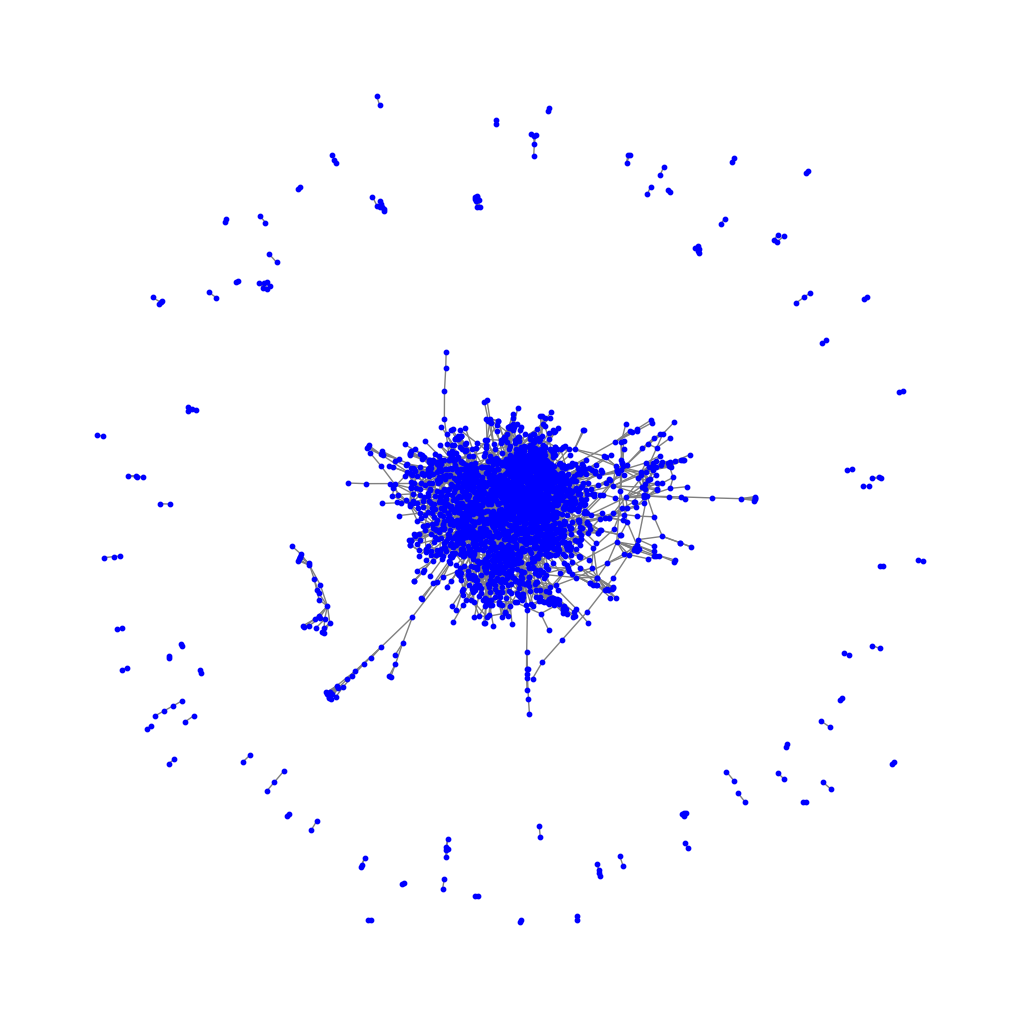